In [39]:
import pandas as pd
from catboost import CatBoostRegressor, Pool, cv

In [40]:
# Load your data
data = pd.read_csv("catboost_training_data.csv")

In [41]:
data.isnull().sum()

date                  0
country               0
brand                 0
dayweek               0
ther_area        350279
main_channel          0
month                 0
monthly               0
n_wd_bef              0
n_wd_aft              0
wd                    0
wd_left               0
wd_perc               0
hospital_rate    496233
phase                 0
dtype: int64

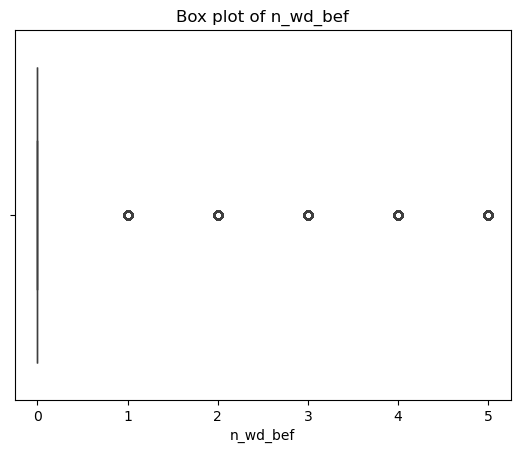

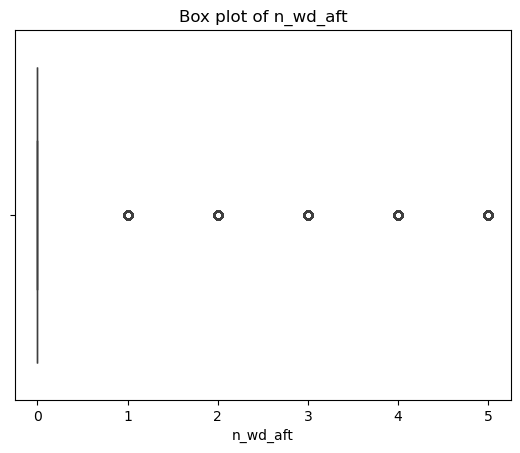

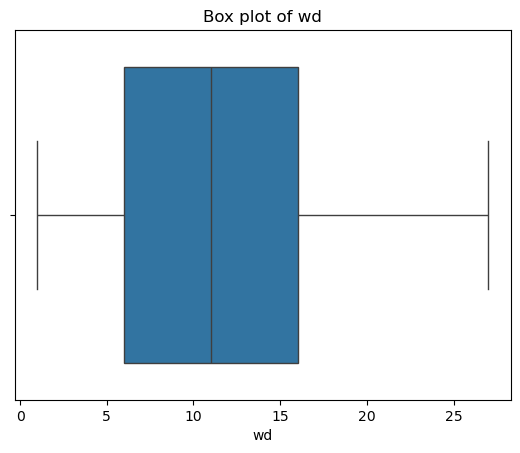

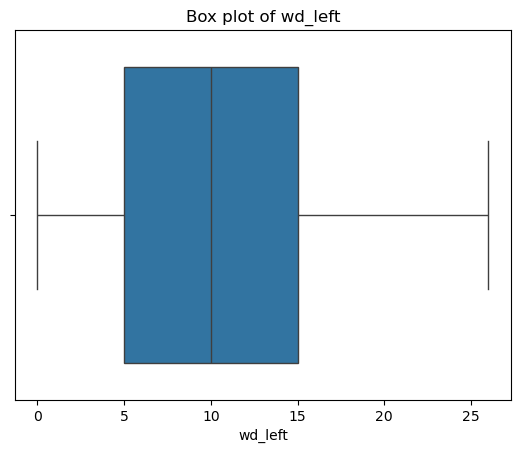

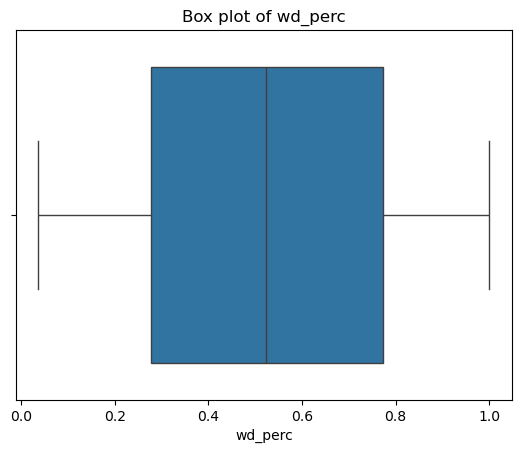

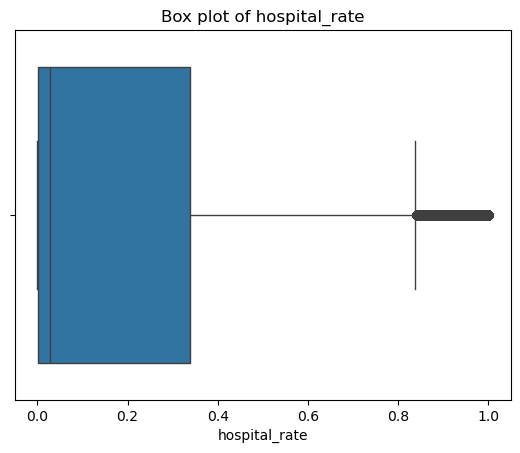

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['n_wd_bef', 'n_wd_aft', 'wd', 'wd_left', 'wd_perc', 'hospital_rate']

# Plotting box plots for each numerical feature
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [42]:
# Optional: Sort by date if the data isn't already sorted
data.sort_values('date', inplace=True)
data

,date,country,brand,dayweek,ther_area,main_channel,month,monthly,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,phase
1125189,2013-01-01,Etheria,VCWIO,1.0,C,RETAIL,1.0,0.013765,0,0,1,21,0.045455,0.00000,0.0
1130375,2013-01-01,Etheria,ZVLFE,1.0,M,RETAIL,1.0,0.014924,0,0,1,21,0.045455,0.00000,0.0
1111288,2013-01-01,Etheria,HIBSM,1.0,N,RETAIL,1.0,0.010161,0,0,1,21,0.045455,0.00000,0.0
1115508,2013-01-01,Etheria,KMXBC,1.0,N,RETAIL,1.0,0.024530,0,0,1,21,0.045455,0.00000,0.0
1116105,2013-01-01,Etheria,LGFTN,1.0,N,RETAIL,1.0,0.062210,0,0,1,21,0.045455,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135776,2021-12-31,Fangorn,EUJWP,4.0,A,HOSPITAL,12.0,0.057745,0,0,23,0,1.000000,1.00000,0.0
171569,2021-12-31,Arendelle,PPXOK,4.0,C,RETAIL,12.0,0.008769,0,0,23,0,1.000000,0.00000,0.0
160405,2021-12-31,Arendelle,MLKJM,4.0,S,RETAIL,12.0,0.030177,0,0,23,0,1.000000,0.00000,0.0
125895,2021-12-31,Aldovia,YUHDX,4.0,N,RETAIL,12.0,0.060633,0,0,21,0,1.000000,0.01422,0.0


In [43]:
data['ther_area'] = data['ther_area'].fillna('U')
data['month'] = data['month'].astype(int)
data['dayweek'] = data['dayweek'].astype(int)
# Identify categorical columns
categorical_features = ['brand', 'country', 'dayweek', 'month', 'ther_area', 'main_channel']
# Ensure categorical columns are of type 'category'
for cat_feature in categorical_features:
    data[cat_feature] = data[cat_feature].astype('category')

In [45]:
data.isnull().sum()

date                  0
country               0
brand                 0
dayweek               0
ther_area             0
main_channel          0
month                 0
monthly               0
n_wd_bef              0
n_wd_aft              0
wd                    0
wd_left               0
wd_perc               0
hospital_rate    496233
phase                 0
dtype: int64

In [46]:
# Example: Use the last 20% of data as the test set
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

In [47]:
# Prepare the training and test sets
X_train = train_data.drop(['date', 'monthly', 'phase'], axis=1)
y_train = train_data['phase']
X_test = test_data.drop(['date', 'monthly', 'phase'], axis=1)
y_test = test_data['phase']

# Create Pool objects
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, cat_features=categorical_features)

In [48]:
model = CatBoostRegressor(iterations=1000, depth=8, learning_rate=0.1, loss_function='RMSE')
model.fit(train_pool)

0:	learn: 0.0563186	total: 747ms	remaining: 12m 26s
1:	learn: 0.0560876	total: 1.18s	remaining: 9m 47s
2:	learn: 0.0559103	total: 1.6s	remaining: 8m 51s
3:	learn: 0.0556964	total: 2.08s	remaining: 8m 38s
4:	learn: 0.0554949	total: 2.56s	remaining: 8m 28s
5:	learn: 0.0553343	total: 2.9s	remaining: 8m 1s
6:	learn: 0.0552066	total: 3.3s	remaining: 7m 48s
7:	learn: 0.0550685	total: 3.76s	remaining: 7m 46s
8:	learn: 0.0549837	total: 4.21s	remaining: 7m 43s
9:	learn: 0.0548680	total: 4.59s	remaining: 7m 34s
10:	learn: 0.0547601	total: 5.15s	remaining: 7m 43s
11:	learn: 0.0546565	total: 5.66s	remaining: 7m 46s
12:	learn: 0.0545800	total: 6.1s	remaining: 7m 43s
13:	learn: 0.0545094	total: 6.62s	remaining: 7m 46s
14:	learn: 0.0544056	total: 7.12s	remaining: 7m 47s
15:	learn: 0.0543559	total: 7.64s	remaining: 7m 49s
16:	learn: 0.0542587	total: 8.03s	remaining: 7m 44s
17:	learn: 0.0541805	total: 8.42s	remaining: 7m 39s
18:	learn: 0.0541117	total: 8.74s	remaining: 7m 31s
19:	learn: 0.0540527	total

In [49]:
from sklearn.metrics import mean_squared_error

# Predict
predictions = model.predict(test_pool)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.002977666165269212


In [67]:
df_submission = pd.read_parquet("submission_data.parquet")

In [71]:
# Create a mapping DataFrame from df
mapping_df = data.dropna(subset=['main_channel']).drop_duplicates(subset=['country', 'brand'])[['country', 'brand', 'main_channel']]

# Merge with df_submission
df_submission = pd.merge(df_submission, mapping_df, on=['country', 'brand'], how='left', suffixes=('', '_from_df'))

# Fill NaN values in df_submission['Main_channel'] from the merged column
df_submission['main_channel'] = df_submission['main_channel'].fillna(df_submission['main_channel_from_df'])

# Drop the extra column used for merging
df_submission.drop(columns=['main_channel_from_df'], inplace=True)
df_submission

,country,brand,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,main_channel
0,Aldovia,AIMST,0,1,0.047619,U,NaN,2.0,0.0,5,4,4,4,4,2022-01-03,1,20,COMBINED
1,Aldovia,AIMST,1,1,0.095238,U,NaN,0.0,0.0,5,4,4,4,4,2022-01-04,2,19,COMBINED
2,Aldovia,AIMST,2,1,0.142857,U,NaN,0.0,0.0,5,4,4,4,4,2022-01-05,3,18,COMBINED
3,Aldovia,AIMST,3,1,0.190476,U,NaN,0.0,0.0,5,4,4,4,4,2022-01-06,4,17,COMBINED
4,Aldovia,AIMST,4,1,0.238095,U,NaN,0.0,2.0,5,4,4,4,4,2022-01-07,5,16,COMBINED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180840,Zamunda,ZKKLD,0,12,0.733333,R,0.00088,2.0,0.0,3,3,3,2,4,2022-12-19,11,4,RETAIL
180841,Zamunda,ZKKLD,1,12,0.800000,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-20,12,3,RETAIL
180842,Zamunda,ZKKLD,2,12,0.866667,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-21,13,2,RETAIL
180843,Zamunda,ZKKLD,3,12,0.933333,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-22,14,1,RETAIL


In [75]:
if 'U' not in df_submission['ther_area'].cat.categories:
    df_submission['ther_area'] = df_submission['ther_area'].cat.add_categories(['U'])
df_submission['ther_area'] = df_submission['ther_area'].fillna('U')
df_submission['month'] = df_submission['month'].astype(int)
df_submission['dayweek'] = df_submission['dayweek'].astype(int)
# Identify categorical columns
categorical_features = ['brand', 'country', 'dayweek', 'month', 'ther_area', 'main_channel']
# Ensure categorical columns are of type 'category'
for cat_feature in categorical_features:
    df_submission[cat_feature] = df_submission[cat_feature].astype('category')
submission_X_test = df_submission.drop(['date'], axis=1)
submission_predictions = model.predict(submission_X_test)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=4]=0.047619047619047616 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [74]:
df_submission.isnull().sum()

country              0
brand                0
dayweek              0
month                0
wd_perc              0
ther_area            0
hospital_rate    19858
n_nwd_bef            0
n_nwd_aft            0
n_weekday_0          0
n_weekday_1          0
n_weekday_2          0
n_weekday_3          0
n_weekday_4          0
date                 0
wd                   0
wd_left              0
main_channel         0
dtype: int64

In [53]:
submission_X_test = df_submission.drop(['date'], axis=1)
submission_predictions = model.predict(submission_X_test)
submission_predictions

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=4]=0.047619047619047616 : cat_features must be integer or string, real number values and NaN values should be converted to string.

We can revisit it later

In [6]:
data[(data['hospital_rate'].isnull()) & (data['country'] == 'Prydain')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2481110,ORUVA,0.165912,Prydain,2.0,1.0,0.045455,J,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.038207,NaN
2474784,MOAJK,0.000000,Prydain,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.007137,NaN
2494169,QYGNN,0.000000,Prydain,2.0,1.0,0.045455,N,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.031543,NaN
2445002,GIKKL,0.000000,Prydain,2.0,1.0,0.045455,N,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.022342,NaN
2439100,ELXGP,0.000000,Prydain,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496536,RBBLK,0.000000,Prydain,0.0,11.0,0.952381,NaN,NaN,2.0,0.0,4,5,4,4,4,2021-11-29,20,1,0.015441,NaN
2496537,RBBLK,0.102185,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.015441,NaN
2427274,AITPJ,0.025644,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.008757,NaN
2455448,HZCGL,0.066833,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.008473,NaN


In [7]:
data[(~data['hospital_rate'].isnull()) & (data['country'] == 'Prydain')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2482618,PJZBL,0.000000,Prydain,2.0,1.0,0.045455,R,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.030115,HOSPITAL
2477362,NXPMK,0.000000,Prydain,2.0,1.0,0.045455,L,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.120688,HOSPITAL
2475198,MRHKP,0.000000,Prydain,2.0,1.0,0.045455,C,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.043509,HOSPITAL
2472796,LRHOW,0.000000,Prydain,2.0,1.0,0.045455,A,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.013811,HOSPITAL
2470073,LGFTN,0.000000,Prydain,2.0,1.0,0.045455,N,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.019258,HOSPITAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441577,EUJWP,0.203659,Prydain,3.0,12.0,1.000000,A,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.075985,HOSPITAL
2479171,NXPMK,0.194407,Prydain,3.0,12.0,1.000000,L,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.088226,HOSPITAL
2502690,TFRIZ,0.002378,Prydain,3.0,12.0,1.000000,S,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.061760,HOSPITAL
2506404,TXYQX,0.000000,Prydain,3.0,12.0,1.000000,B,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.061217,HOSPITAL


In [10]:
data[(~data['hospital_rate'].isnull()) & (data['country'] == 'Ethieria')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel


Here we are assuming that rate of hospital sales are dependent on the country rather than the brand itself since the healthcare structures and distribution policies vary by country. Hence are taking a country wide average and filling it for the missing hospital rates for the given countries.

In [16]:
# Calculate the mean 'hospital_rate' for each country
country_means = data.groupby('country')['hospital_rate'].transform('mean')

# Fill missing values in 'hospital_rate' with their respective country means
data['hospital_rate'] = data['hospital_rate'].fillna(country_means)
data

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1442742,VCWIO,0.0,Etheria,1.0,1.0,0.045455,C,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.013765,RETAIL
1414704,HIBSM,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.010161,RETAIL
1449827,ZKMVW,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.060426,RETAIL
1452477,ZVLFE,0.0,Etheria,1.0,1.0,0.045455,M,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.014924,RETAIL
1423379,KMXBC,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.024530,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24883,EQZWB,0.0,Aldovia,4.0,12.0,1.000000,NaN,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.022134,NaN
1864862,HIBSM,0.0,Hogwarts,4.0,12.0,1.000000,N,0.094895,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.002765,RETAIL
178322,FUYDW,0.0,Arendelle,4.0,12.0,1.000000,D,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.002499,RETAIL
1485596,LRHOW,0.0,Fangorn,4.0,12.0,1.000000,A,1.000000,0.0,3.0,4,4,5,5,5,2021-12-31,23,0,0.017103,HOSPITAL


But there are still a few countries with missing hospital rates. Since we have no other options for determining them, we will take the company wide average for those

In [34]:
# Calculate the mean 'hospital_rate' for each country
country_means = data.groupby('brand')['hospital_rate'].transform('mean')

# Fill missing values in 'hospital_rate' with their respective country means
data['hospital_rate'] = data['hospital_rate'].fillna(country_means)
data

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1442742,VCWIO,0.0,Etheria,1.0,1.0,0.045455,C,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.013765,RETAIL
1414704,HIBSM,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.010161,RETAIL
1449827,ZKMVW,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.060426,RETAIL
1452477,ZVLFE,0.0,Etheria,1.0,1.0,0.045455,M,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.014924,RETAIL
1423379,KMXBC,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.024530,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24883,EQZWB,0.0,Aldovia,4.0,12.0,1.000000,U,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.022134,NaN
1864862,HIBSM,0.0,Hogwarts,4.0,12.0,1.000000,N,0.094895,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.002765,RETAIL
178322,FUYDW,0.0,Arendelle,4.0,12.0,1.000000,D,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.002499,RETAIL
1485596,LRHOW,0.0,Fangorn,4.0,12.0,1.000000,A,1.000000,0.0,3.0,4,4,5,5,5,2021-12-31,23,0,0.017103,HOSPITAL


But even with that there are still over 10000 cases where the hospital rate cannot be associate with country or brand. For this cases we will make it 0

In [37]:
data['hospital_rate'].fillna(0, inplace=True)
data.isnull().sum()

brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        106667
hospital_rate         0
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

In [22]:
data[data['ther_area'].isnull()]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2474784,MOAJK,0.000000,Prydain,2.0,1.0,0.045455,NaN,1.000000,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.007137,NaN
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,0.339844,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
2702574,CQXPP,0.000000,Sokovia,2.0,1.0,0.047619,NaN,0.000000,1.0,0.0,3,4,5,5,4,2013-01-02,1,20,0.008211,NaN
2698591,AIMST,0.000000,Sokovia,2.0,1.0,0.047619,NaN,0.000000,1.0,0.0,3,4,5,5,4,2013-01-02,1,20,0.006796,NaN
2439100,ELXGP,0.000000,Prydain,2.0,1.0,0.045455,NaN,1.000000,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861369,HGXNC,0.000000,Hogwarts,4.0,12.0,1.000000,NaN,0.118509,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.013630,NaN
43640,HGXNC,0.000000,Aldovia,4.0,12.0,1.000000,NaN,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.023413,NaN
188970,HZCGL,0.000000,Arendelle,4.0,12.0,1.000000,NaN,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.009230,NaN
200206,KGUIR,0.000000,Arendelle,4.0,12.0,1.000000,NaN,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.076724,NaN


In [26]:
# Aggregate data to count non-null 'ther_area' values for each brand
brand_ther_area_count = data.groupby('brand')['ther_area'].count().reset_index()
brand_ther_area_count

,brand,ther_area
0,ABRRE,10197
1,AIMST,0
2,AITPJ,0
3,AIZTT,13225
4,AMOKR,17187
...,...,...
253,ZKMVW,43518
254,ZNDRT,33245
255,ZQSPB,1098
256,ZQXSU,0


In [29]:
# Filter brands with no non-null 'ther_area' values
brands_without_ther_area = brand_ther_area_count[brand_ther_area_count['ther_area'] == 0]['brand']
brands_without_ther_area

1      AIMST
2      AITPJ
6      ARBSZ
9      BFFIN
12     BQSIJ
       ...  
239    YCDFR
241    YMBRG
242    YMOTM
249    ZBEBV
256    ZQXSU
Name: brand, Length: 100, dtype: object

In [33]:
# Ensure 'ther_area' is of categorical type with 'U' as a category
data['ther_area'] = data['ther_area'].astype('category')
if 'U' not in data['ther_area'].cat.categories:
    data['ther_area'] = data['ther_area'].cat.add_categories(['U'])

# Update 'ther_area' to 'U' for the identified brands
data.loc[data['brand'].isin(brands_without_ther_area), 'ther_area'] = 'U'

data.isnull().sum()

brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        106667
hospital_rate     67093
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

Since the above brands did't have any associated ther_area, I introduce new category "unknown"
But what about the brands that has both null and ther_area codes. Let's explore them

In [18]:
null_rows = data[data['hospital_rate'].isnull()]
null_rows

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1619363,DXHFH,0.000000,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.025549,NaN
1642603,JJVUD,0.010195,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.064120,NaN
1679359,VDVBR,0.000000,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.021126,NaN
1680503,VXLPO,0.000154,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.023169,NaN
1691529,YSZJP,0.000809,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.017223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620940,DXHFH,0.012355,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.018036,NaN
1648264,JTOEV,0.054766,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.023054,NaN
1648885,KVWWC,0.129000,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.009905,NaN
1696016,ZVLFE,0.011980,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.006133,NaN


In [19]:
null_rows['country'].unique()

array(['Gallifrey'], dtype=object)